# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [1]:
from google.colab import drive
drive._mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the necessary libraries**

In [2]:
#Import ML required packages
import numpy as np
import pandas as pd
from pandas import HDFStore
import h5py as h5fy
import tensorflow as tf
import keras
from tensorflow.keras.utils import to_categorical
#Import Libraries before model creation
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization
from keras.layers import Dense,Dropout,Activation,Flatten, LeakyReLU
from keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler




**Let us check the version of tensorflow.**

In [3]:
tf.__version__

'2.13.0'

## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [4]:
#Load and Read the dataset
h5f=h5fy.File('/content/drive/MyDrive/MIT_DS2023/SVHN_single_grey1.h5','r')
print('Dataset loaded successfully')


Dataset loaded successfully


In [5]:
h5f.keys

<bound method MappingHDF5.keys of <HDF5 file "SVHN_single_grey1.h5" (mode r)>>

Split and Check the number of images in the training and the testing dataset.

In [6]:
# Split the data into the train and the test dataset.
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
print('X_train' ,X_train.shape)
print('y_train' ,y_train.shape)
print('X_test' ,X_test.shape)
print('y_test' ,y_test.shape)
# Closing the file
h5f.close()

X_train (42000, 32, 32)
y_train (42000,)
X_test (18000, 32, 32)
y_test (18000,)


In [7]:
len(X_train), len(X_test)

(42000, 18000)

Let's look at a random image data

Label:  6


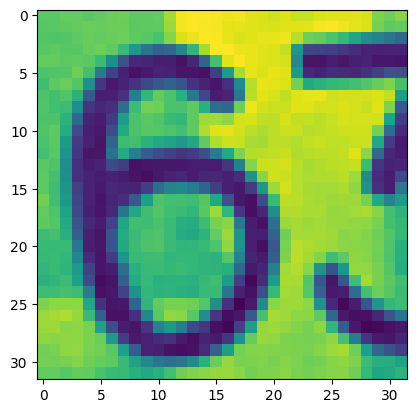

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1][:][:])
print('Label: ', y_train[1])

The image is of number 6 and the label is six.

**Observation:**

We have 42000 images of size 32 x 32 in our training dataset.
We have 18000 images of size 32 x 32 in our test dataset.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

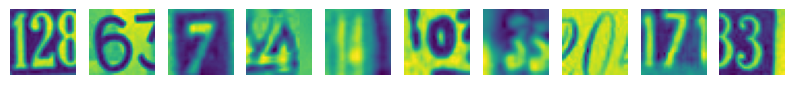

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [9]:
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])#, cmap="gray")
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [10]:
# Shape of the images and the first image
print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [11]:
# Reshaping the dataset to flatten them. We are reshaping the 2D image data into a 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

### **Normalize the train and the test data**

In [12]:
# Normalizing the train and the test dataset by dividing by 255.
# Normalizing inputs from 0-255 to 0-1

X_train = X_train/255
X_test = X_test/255

Print the shapes of Training and Test data

In [13]:
# New shape

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


### **One-hot encode output**

In [14]:
y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# Test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
Target variable entry has been conveterd (or one-hot encoded) to vector instead of a single label.


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [15]:
#Fixing the seed for random number generators for repeatability
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [16]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function based on above setting
def ann_model_1():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1024, )),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
    ])

    #declare adam optimizer with learning rate of 0.001
    adam = optimizers.Adam(learning_rate=0.001)

    #compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics = ['accuracy'])
    return model

In [17]:
# Build the model
model_1 = ann_model_1()

In [18]:
#Print the summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Fit the model
history_model_1 = model_1.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=128, verbose = 1)

Epoch 1/20
263/263 [==============================] - 13s 10ms/step - loss: 2.2966 - accuracy: 0.1149 - val_loss: 2.2563 - val_accuracy: 0.1470
Epoch 2/20
263/263 [==============================] - 2s 7ms/step - loss: 2.1132 - accuracy: 0.2275 - val_loss: 1.9753 - val_accuracy: 0.3154
Epoch 3/20
263/263 [==============================] - 2s 7ms/step - loss: 1.9138 - accuracy: 0.3293 - val_loss: 1.8557 - val_accuracy: 0.3582
Epoch 4/20
263/263 [==============================] - 2s 8ms/step - loss: 1.8125 - accuracy: 0.3811 - val_loss: 1.7706 - val_accuracy: 0.4001
Epoch 5/20
263/263 [==============================] - 1s 4ms/step - loss: 1.7037 - accuracy: 0.4256 - val_loss: 1.6556 - val_accuracy: 0.4427
Epoch 6/20
263/263 [==============================] - 2s 6ms/step - loss: 1.5946 - accuracy: 0.4629 - val_loss: 1.5464 - val_accuracy: 0.4857
Epoch 7/20
263/263 [==============================] - 2s 6ms/step - loss: 1.5175 - accuracy: 0.4941 - val_loss: 1.5090 - val_accuracy: 0.4979
Epoc

### **Plot the Training and Validation Accuracies and write down your Observations.**

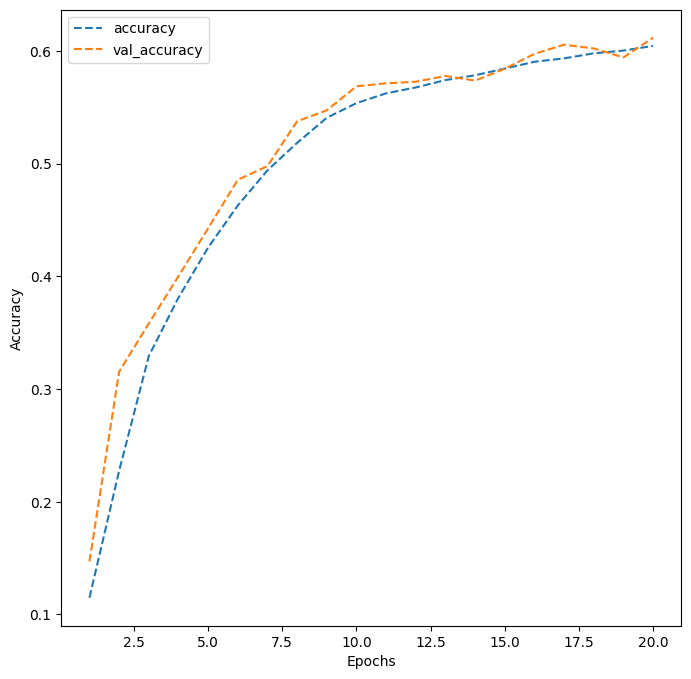

In [20]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**
The Accuracy of training and validation are very close. This tells us that the model is not over fitting the training dataset. The Accuracy is steadily increasing until 15th epoch then tapering off. Validation accuracy is treanding slightly higher than the training dataset until epoch 18, after which training accuracy is higher than the validation accuracy. The model may start to overfit the training dataset if we run it beyond 20 epoch. The model accuracy is approximately 0.6 on training and on validation dataset.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [21]:
#Clearing keras backend
from tensorflow.keras import backend
backend.clear_session()

In [22]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [23]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Defining the function based on above settings
def ann_model_2():
    model = tf.keras.Sequential([
      tf.keras.layers.Dense(256, activation='relu', input_shape=(1024, )),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(rate = 0.2),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(10, activation = 'softmax')
    ])

    #declare adam optimizer with learning rate of 0.0005
    adam = optimizers.Adam(learning_rate=0.0005)

    #compile the model
    model.compile(optimizer=adam, loss= 'categorical_crossentropy', metrics= ['accuracy'])

    return model

In [24]:
# Build the model
model_2 = ann_model_2()

In [25]:
#Print the model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (Batch  (None, 32)                1

In [26]:
# Fit the model
history_model_2 = model_2.fit(X_train,y_train, epochs=30, validation_split=0.2, batch_size=128, verbose = 1)

Epoch 1/30
263/263 [==============================] - 4s 7ms/step - loss: 2.3278 - accuracy: 0.1001 - val_loss: 2.3056 - val_accuracy: 0.1000
Epoch 2/30
263/263 [==============================] - 2s 8ms/step - loss: 2.3046 - accuracy: 0.1045 - val_loss: 2.3058 - val_accuracy: 0.1020
Epoch 3/30
263/263 [==============================] - 2s 8ms/step - loss: 2.1847 - accuracy: 0.1737 - val_loss: 2.0971 - val_accuracy: 0.2251
Epoch 4/30
263/263 [==============================] - 2s 6ms/step - loss: 1.6479 - accuracy: 0.4285 - val_loss: 1.5044 - val_accuracy: 0.5449
Epoch 5/30
263/263 [==============================] - 2s 6ms/step - loss: 1.3522 - accuracy: 0.5534 - val_loss: 1.2442 - val_accuracy: 0.6024
Epoch 6/30
263/263 [==============================] - 2s 6ms/step - loss: 1.2160 - accuracy: 0.6066 - val_loss: 1.1141 - val_accuracy: 0.6514
Epoch 7/30
263/263 [==============================] - 2s 6ms/step - loss: 1.1260 - accuracy: 0.6362 - val_loss: 1.0543 - val_accuracy: 0.6649
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

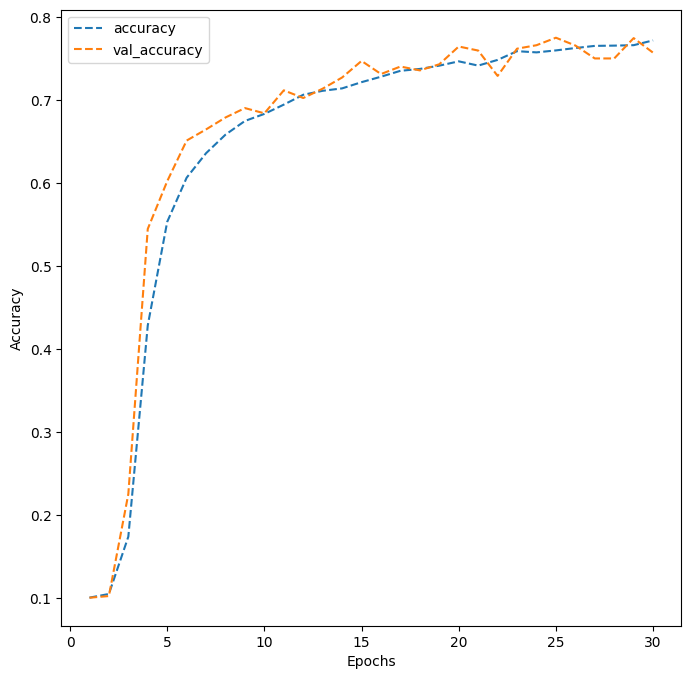

In [27]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**
Training dataset and validation dataset accuracy is similar to some extent indicating that the model is not overfitting.
Accuracy increases rapidly up to 10 epoch, then tapers off.
Validation accuracy starts to adjust to the training accuracy possibly due to the dropout preventing the model from overfitting.
This model is performing better than the previous one with accuracy of 0.77 compared to 0.60, a 28% improvement.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [28]:
# Predicting with test dataset for accuracy check
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

563/563 [==============================] - 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [29]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.84      0.73      0.78      1814
           1       0.71      0.84      0.77      1828
           2       0.69      0.85      0.76      1803
           3       0.70      0.74      0.72      1719
           4       0.75      0.85      0.80      1812
           5       0.79      0.67      0.73      1768
           6       0.91      0.63      0.74      1832
           7       0.79      0.82      0.80      1808
           8       0.82      0.63      0.72      1812
           9       0.65      0.77      0.71      1804

    accuracy                           0.75     18000
   macro avg       0.77      0.75      0.75     18000
weighted avg       0.77      0.75      0.75     18000



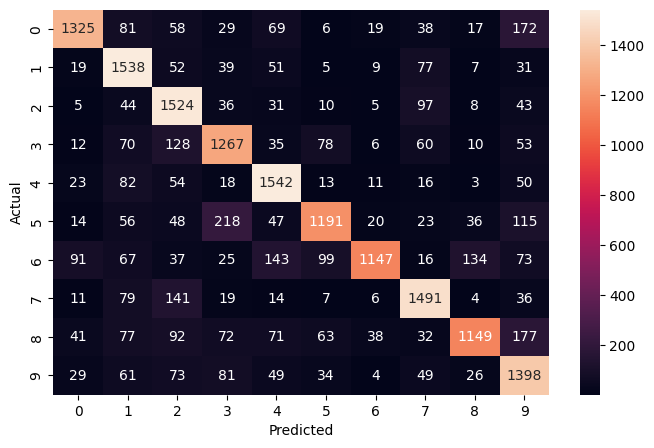

In [30]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Final Observations:**
The classification report tells us that numbers 4 and 7 have the highest f1-score (0.88). They have 80% chances of being accurately predicted. Number 9 has the lowest f1-score of (0.71).
Number 9 has the lowest precision and 6 has the highest, this means that the model is classifing other numbers as 9 which not valid. Whereas 6 has the lowest chances of being invalidly positive.
Numbers 2 and 4 have the highest recall, whereas 6 and 8 have the lowest. It indicates that the model is struggling to identify all 6's and 8's as what they are. Opposed to 2 and 4, which the model idenifies in high rates.
The confusion matrix shows that the model incorrectly predicted 5 with 3 and 8 with 9. This verifies the above obervations about 3, 5, 8 and 9, which shows similar prediction issues in general.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [31]:
# Open the file as read only
h5f = h5fy.File('/content/drive/MyDrive/MIT_DS2023/SVHN_single_grey1.h5', 'r')

print('Dataset loaded successfully')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close the file
h5f.close()

Dataset loaded successfully


Check the number of images in the training and the testing dataset.

In [32]:
len(X_train), len(X_test)

(42000, 18000)

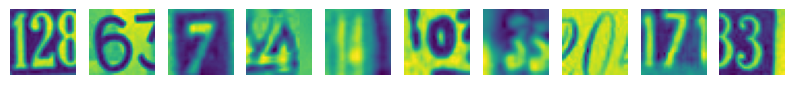

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [33]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i]) #cmap="gray") # write the function to visualize images
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [34]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


**Observation:**
We were able to load the same dataset with 42000 images of size 32 x 32 in our training dataset. We have 18000 images of size 32 x 32 in our test dataset. First image array matrix also look ok.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [35]:
# Reshaping the dataset to flatten them. Remember that we always have to give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0], 32,32,1)
X_test = X_test.reshape(X_test.shape[0], 32,32,1)

Normalize inputs from 0-255 to 0-1

In [36]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0
X_test = X_test / 255.0

Print New shape of Training and Test

In [37]:
# New shape

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [38]:
#Writing the function and appropriate variable name to one-hot encode the output

y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

#test labels
y_test

array([1, 7, 2, ..., 7, 9, 2], dtype=uint8)

**Observation:**
Notice that each entry of y_test is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [39]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [40]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Defining the function based on aboe setting
def cnn_model_1():
    model = Sequential()
    #Added layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dense(10, activation='softmax'))
    #declared adam optimizer with learning rate of 0.001
    adam = optimizers.Adam(learning_rate = 0.001)

    #compile the model
    model.compile(
        loss='categorical_crossentropy',
        optimizer=adam,
        metrics=['accuracy']
    )

    return model

In [41]:
#Build the model
model_1 = cnn_model_1()

In [42]:
#Print the model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                      

In [43]:
# Fit the model
history_model_1 = model_1.fit(
            X_train, y_train_encoded,
            epochs=20,
            validation_split=0.2,
            batch_size = 32,
            verbose=1)

Epoch 1/20
1050/1050 [==============================] - 13s 5ms/step - loss: 1.1047 - accuracy: 0.6376 - val_loss: 0.6222 - val_accuracy: 0.8229
Epoch 2/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.5268 - accuracy: 0.8512 - val_loss: 0.5291 - val_accuracy: 0.8479
Epoch 3/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.4427 - accuracy: 0.8710 - val_loss: 0.5073 - val_accuracy: 0.8560
Epoch 4/20
1050/1050 [==============================] - 6s 5ms/step - loss: 0.3853 - accuracy: 0.8895 - val_loss: 0.4445 - val_accuracy: 0.8770
Epoch 5/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.3398 - accuracy: 0.8975 - val_loss: 0.4574 - val_accuracy: 0.8740
Epoch 6/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.3023 - accuracy: 0.9106 - val_loss: 0.4751 - val_accuracy: 0.8743
Epoch 7/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.2719 - accuracy: 0.9186 - val_loss: 0.4435 - val_accuracy

### **Plot the Training and Validation Accuracies and Write your observations.**

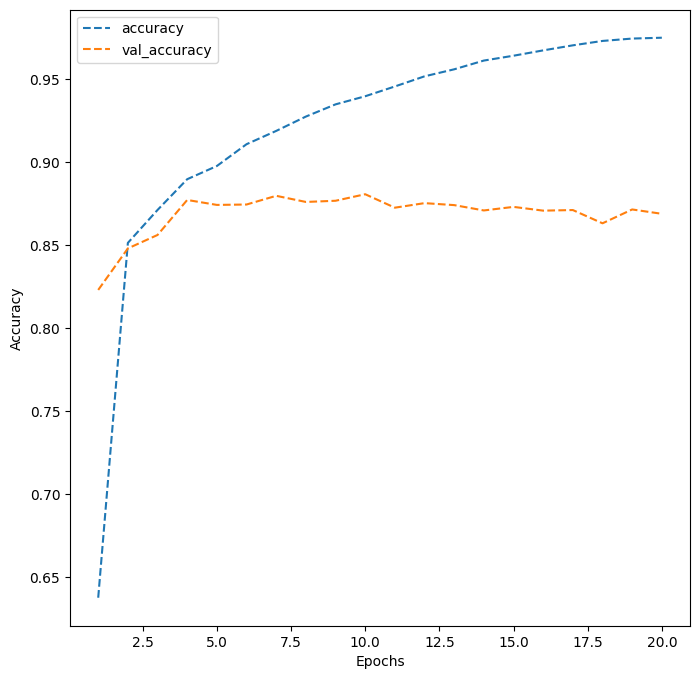

In [44]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**
We can see from the above plot that the model has done poorly on the validation data. The model is overfitting the training data.
The validation accuracy has become unstable and deviates after 2 epochs.
The accuracy is lower afte 2 epochs as the model is overfitting.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [45]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [46]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [47]:
#Define the function
def cnn_model_2():
    model = Sequential()
    #Added layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    #declared adam optimizer with learning rate of 0.001
    adam = optimizers.Adam(learning_rate = 0.001)

    #compile the model
    model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

In [48]:
# Build the model
model_2 = cnn_model_2()

In [49]:
#Print the summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                         

In [50]:
# Fit the model
history_model_2 = model_2.fit(
            X_train, y_train_encoded,
            epochs=30,
            validation_split=0.2,
            batch_size = 128,
            verbose=1)

Epoch 1/30
263/263 [==============================] - 6s 13ms/step - loss: 1.3198 - accuracy: 0.5507 - val_loss: 1.8015 - val_accuracy: 0.4390
Epoch 2/30
263/263 [==============================] - 3s 10ms/step - loss: 0.6658 - accuracy: 0.7954 - val_loss: 0.5167 - val_accuracy: 0.8520
Epoch 3/30
263/263 [==============================] - 3s 11ms/step - loss: 0.5479 - accuracy: 0.8312 - val_loss: 0.4289 - val_accuracy: 0.8808
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 0.4882 - accuracy: 0.8510 - val_loss: 0.3976 - val_accuracy: 0.8893
Epoch 5/30
263/263 [==============================] - 3s 10ms/step - loss: 0.4362 - accuracy: 0.8651 - val_loss: 0.3991 - val_accuracy: 0.8898
Epoch 6/30
263/263 [==============================] - 3s 10ms/step - loss: 0.4046 - accuracy: 0.8746 - val_loss: 0.4278 - val_accuracy: 0.8829
Epoch 7/30
263/263 [==============================] - 3s 12ms/step - loss: 0.3822 - accuracy: 0.8809 - val_loss: 0.3932 - val_accuracy: 0.8904

### **Plot the Training and Validation accuracies and write your observations.**

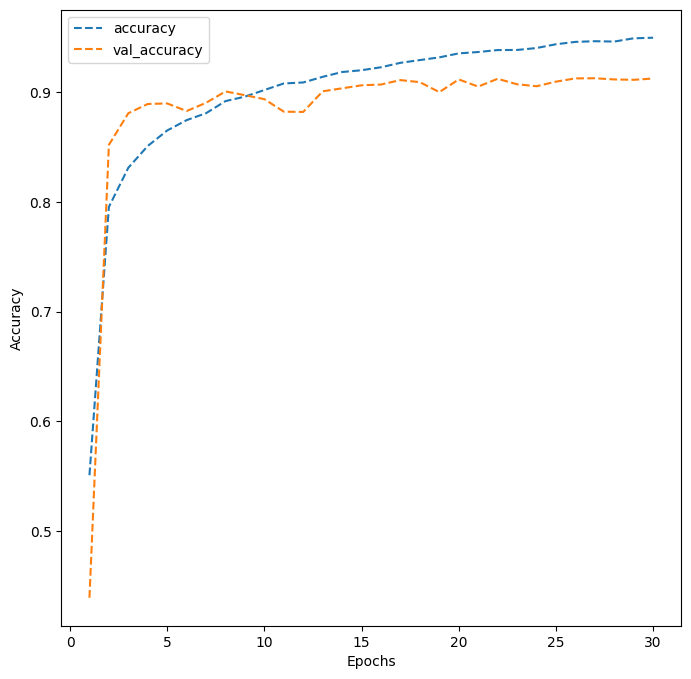

In [51]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**
Additional filters with dropout layers seems to have reduced the overfitting in the second model compared to the previous model but still the validation data ccuracy is around 3% lower than training data accuracy.
The overal accuracy of this model is better than the 1st model.
The Training accuracy is increasing after 5 epochs. It tapesr off around 10 epochs.
The validation accuracy is unstable but overall it is also increasing with the increase in epochs. Same as training accuracy, validation accuracy also has a rapid increase up to around 2 epochs and then has lower increase as it is trying to prevent overfitting.
The model is giving around ~94% accuracy at 30 epochs. At 30 epochs, the accuracy of the model on the training data is about 94% and the validation accuracy is ~91%.
The validation accuracy and train accuracy still has a about 3% difference.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [52]:
#Making prediction on the test data using model_2
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

563/563 [==============================] - 2s 2ms/step


**Note:** Earlier, each entry of the target variable was one-hot encoded vector, to print the classification report and confusion matrix, check entry of y_test for label.

In [53]:
y_test

array([1, 7, 2, ..., 7, 9, 2], dtype=uint8)

### **Write your final observations on the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1814
           1       0.89      0.92      0.90      1828
           2       0.93      0.92      0.92      1803
           3       0.93      0.88      0.90      1719
           4       0.92      0.93      0.93      1812
           5       0.93      0.90      0.92      1768
           6       0.91      0.89      0.90      1832
           7       0.92      0.94      0.93      1808
           8       0.91      0.89      0.90      1812
           9       0.90      0.91      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



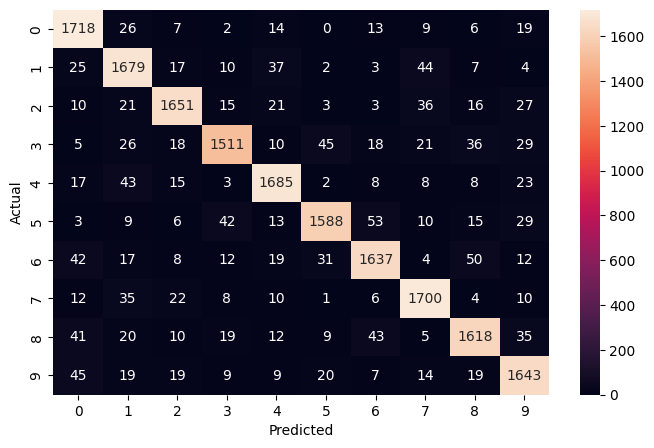

In [54]:
# Importing required libraries
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

**Final Observations:**
The model is approximately 91% accurate on the test data which is comparable to the accuracy of the validation data. This implies that the model is generalizing and performing better.
The recall is high, between 88% and 95%, indicating the fact that most of the objects are identified correctly. This CNN model is able to identify about 95% of 0's but is having difficulty identifying 3 and 8.
The model is confusing 3 with 5 and 8 with 6. Image augmentation or cropping can better help the model to improve acuracy.
Overall the model has performed better than the ANN model in identifying the digits.
Considering the overall results it is clear that CNN model performs better than ANN identifying images.